<a href="https://colab.research.google.com/github/PJ779/Sentiment-Analysis-twitter/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import html


In [ ]:
import os
import json

In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('/content/archive (8).zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
df = pd.read_csv('/content/twitter_training.csv', header = None)
eval_df = pd.read_csv('/content/twitter_validation.csv')

In [ ]:
df.columns = ['Tweet ID', 'Entity', 'sentiment', 'tweet_content' ]

In [ ]:
eval_df.columns = ['Tweet ID', 'Entity', 'sentiment', 'tweet_content' ]

In [ ]:
eval_df

,Tweet ID,Entity,sentiment,tweet_content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.head()

,Tweet ID,Entity,sentiment,tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.shape

(74682, 4)

In [ ]:
df.isnull()

,Tweet ID,Entity,sentiment,tweet_content
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
74677,False,False,False,False
74678,False,False,False,False
74679,False,False,False,False
74680,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Tweet ID,0
Entity,0
sentiment,0
tweet_content,686


In [ ]:
df[df.isnull().any(axis=1)]

,Tweet ID,Entity,sentiment,tweet_content
61,2411,Borderlands,Neutral,NaN
553,2496,Borderlands,Neutral,NaN
589,2503,Borderlands,Neutral,NaN
745,2532,Borderlands,Positive,NaN
1105,2595,Borderlands,Positive,NaN
...,...,...,...,...
73972,9073,Nvidia,Positive,NaN
73973,9073,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN
74422,9154,Nvidia,Positive,NaN


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(73996, 4)

In [ ]:
df.isnull().sum()

,0
Tweet ID,0
Entity,0
sentiment,0
tweet_content,0


In [ ]:
df.head()

,Tweet ID,Entity,sentiment,tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
Negative,22358
Positive,20655
Neutral,18108
Irrelevant,12875


In [ ]:
df.groupby('sentiment').apply(lambda x: x.sample(2))

Tweet ID                     Entity   sentiment  \
sentiment                                                           
Irrelevant 62793      5164        GrandTheftAuto(GTA)  Irrelevant   
           25117      4712                     Google  Irrelevant   
Negative   31246      7366            LeagueOfLegends    Negative   
           49353      6072                       FIFA    Negative   
Neutral    69188      3851              Cyberpunk2077     Neutral   
           2836       1692  CallOfDutyBlackopsColdWar     Neutral   
Positive   49675      6127                       FIFA    Positive   
           11067     13102              Xbox(Xseries)    Positive   

                                                      tweet_content  
sentiment                                                            
Irrelevant 62793  please bro i lost my account id / cannot open ...  
           25117  Don't google @ MaxMeowstic and look at the fir...  
Negative   31246  the implication that seraphine God has witness...  
           49353  Fifa makes Barca's black and gold uniforms loo...  
Neutral    69188    @ Freedom Game. Free song. (bet u don't reply).  
           2836   2016 When graduate I complete hearing the batt...  
Positive   49675     Beautiful lil fifa sesh before I end the night  
           11067  Tried my hardest to get a Xbox series x today ...

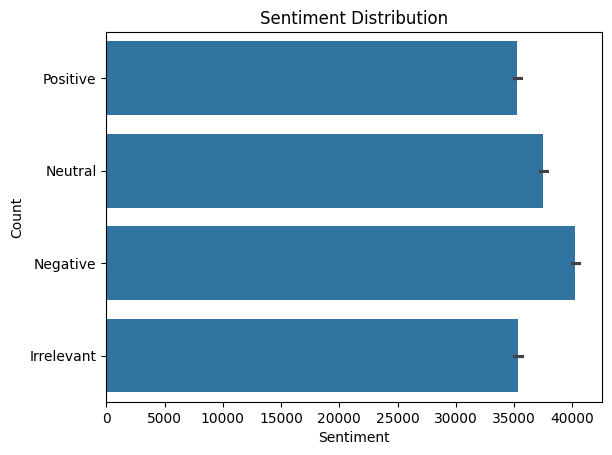

In [ ]:
ax = sns.barplot(data = df['sentiment'])
ax.set_title('Sentiment Distribution')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
plt.show()

In [ ]:
from wordcloud import WordCloud

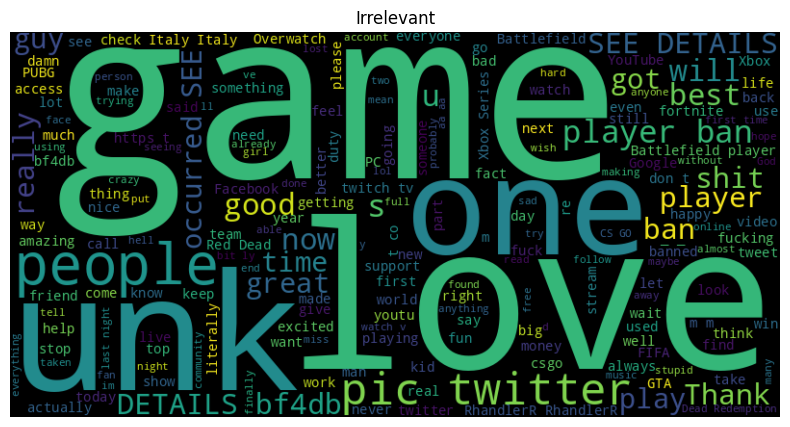

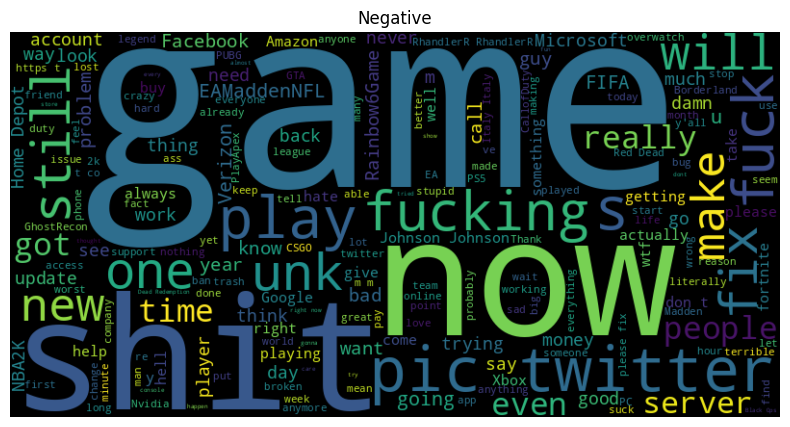

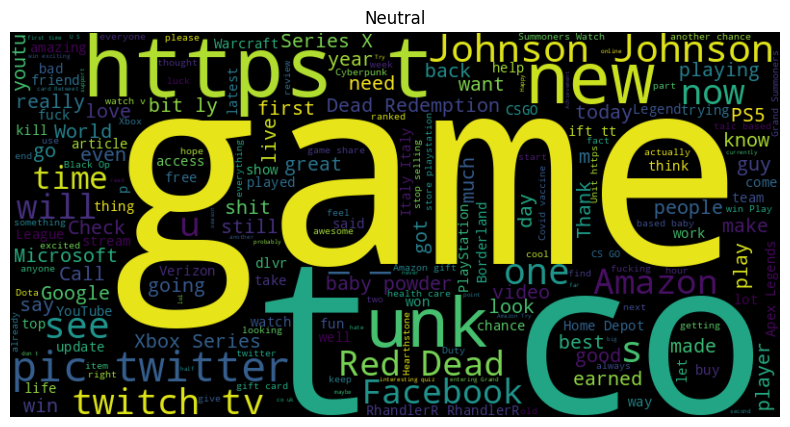

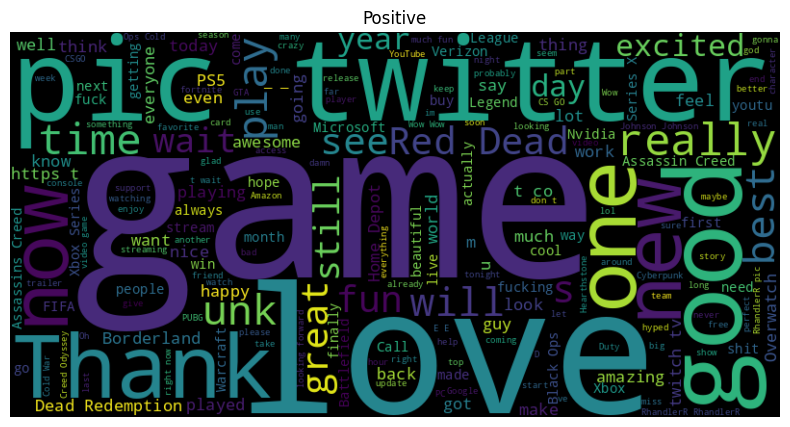

In [ ]:
for sentiment, group in df.groupby('sentiment'):
    wordcloud = WordCloud(width=800, height=400).generate(' '.join(group['tweet_content']))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(sentiment)
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
import nltk

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
vectorizer = CountVectorizer(stop_words='english')

In [ ]:
sample = 'My work in Maths or Stats or CS'

In [ ]:
#X = vectorizer.fit_transform(df['tweet_content'])
#X #data_leakage

<73996x30764 sparse matrix of type '<class 'numpy.int64'>'
	with 730228 stored elements in Compressed Sparse Row format>

In [ ]:
#y = df['sentiment']

In [ ]:
X_train, X_val, y_train, y_val =train_test_split(df['tweet_content'], df['sentiment'], test_size= 0.25, random_state= 38)

In [ ]:
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

In [ ]:
mnb = MultinomialNB()

In [ ]:
param_grid = {
    'alpha': [0.1, 1, 10],
    'fit_prior': [True, False],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=20, scoring='f1_macro')

In [ ]:
grid_search.fit(X_train_vec, y_train)

GridSearchCV(cv=20, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1, 10], 'fit_prior': [True, False]},
             scoring='f1_macro')

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'alpha': 0.1, 'fit_prior': True}
Best score: 0.7974343660134686


In [ ]:
best_mnb = grid_search.best_estimator_
best_mnb

MultinomialNB(alpha=0.1)

In [ ]:
y_pred = best_mnb.predict(X_val_vec)
y_pred

array(['Irrelevant', 'Irrelevant', 'Positive', ..., 'Irrelevant',
       'Negative', 'Neutral'], dtype='<U10')

In [ ]:
from sklearn.metrics import precision_score, recall_score


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
report = classification_report(y_val, y_pred, output_dict=True)
report

{'Irrelevant': {'precision': 0.8455313159746657,
  'recall': 0.7387027359360591,
  'f1-score': 0.7885151763740771,
  'support': 3253.0},
 'Negative': {'precision': 0.7561165653732274,
  'recall': 0.8664285714285714,
  'f1-score': 0.8075226762087042,
  'support': 5600.0},
 'Neutral': {'precision': 0.8547812817904374,
  'recall': 0.7440779278282046,
  'f1-score': 0.7955971120842703,
  'support': 4517.0},
 'Positive': {'precision': 0.7893745290128108,
  'recall': 0.8169233768765841,
  'f1-score': 0.8029127143815272,
  'support': 5129.0},
 'accuracy': 0.8003675874371587,
 'macro avg': {'precision': 0.8114509230377853,
  'recall': 0.7915331530173548,
  'f1-score': 0.7986369197621447,
  'support': 18499.0},
 'weighted avg': {'precision': 0.8051524485707213,
  'recall': 0.8003675874371587,
  'f1-score': 0.7999901790832542,
  'support': 18499.0}}

In [ ]:
from sklearn.metrics import f1_score


In [ ]:
f1_score(y_val, y_pred, average='macro')

0.7986369197621447

In [ ]:
precision = precision_score(y_val, y_pred, average='macro')
precision

0.8114509230377853

In [ ]:
recall = recall_score(y_val, y_pred, average='macro')
recall

0.7915331530173548

In [ ]:
cm =confusion_matrix(y_val, y_pred)

In [ ]:
cm

array([[2403,  405,  107,  338],
       [ 148, 4852,  228,  372],
       [ 163,  585, 3361,  408],
       [ 128,  575,  236, 4190]])

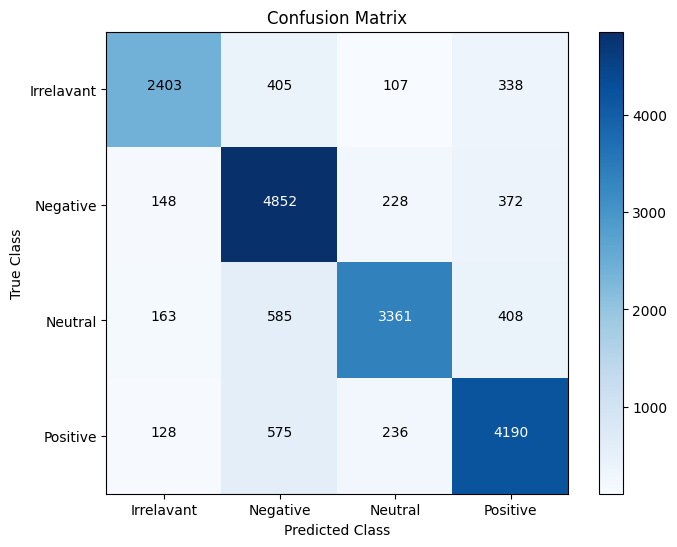

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add number labels to the cells
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Add labels to the x and y axes
plt.xticks(range(cm.shape[1]), ['Irrelavant', 'Negative', 'Neutral', 'Positive'])
plt.yticks(range(cm.shape[0]), ['Irrelavant', 'Negative', 'Neutral', 'Positive'])

# Add a color bar
plt.colorbar()

# Show the plot
plt.show()

########## DONE WITH MNB###################


############SGD Reg###########


In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
param_grid_sgd = { 'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
                   'learning_rate': ['optimal', 'constant', 'invscaling'],
}

In [ ]:
grid_search_sgd = GridSearchCV(SGDClassifier(max_iter=100, early_stopping=True), param_grid_sgd, cv=20, scoring='f1_macro')

In [ ]:
grid_search_sgd.fit(X_train_vec, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

GridSearchCV(cv=20, estimator=SGDClassifier(early_stopping=True, max_iter=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'learning_rate': ['optimal', 'constant', 'invscaling'],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron'],
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [ ]:
print("Best hyperparameters:", grid_search_sgd.best_params_)
print("Best score:", grid_search_sgd.best_score_)

Best hyperparameters: {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'l2'}
Best score: 0.8385224353734344


In [ ]:
best_sgd = grid_search_sgd.best_estimator_
best_sgd

SGDClassifier(early_stopping=True, loss='modified_huber', max_iter=100)

In [ ]:
y_pred_sgd = best_sgd.predict(X_val_vec)
y_pred_sgd

array(['Irrelevant', 'Neutral', 'Positive', ..., 'Irrelevant', 'Positive',
       'Neutral'], dtype='<U10')

In [ ]:
accuracy_score(y_val, y_pred_sgd)

0.848208011243851

In [ ]:
f1_score(y_val, y_pred_sgd, average='macro')

0.8464274148163351

In [ ]:
recall_sgd = recall_score(y_val, y_pred_sgd, average='macro')
recall_sgd

0.8407167117021214

In [ ]:
precision_sgd = precision_score(y_val, y_pred_sgd, average='macro')
precision_sgd

0.8564152246375787

In [ ]:
classification_report(y_val, y_pred_sgd, output_dict=True)

{'Irrelevant': {'precision': 0.8878082667592915,
  'recall': 0.7857362434675684,
  'f1-score': 0.8336594911937377,
  'support': 3253.0},
 'Negative': {'precision': 0.865031757233592,
  'recall': 0.8755357142857143,
  'f1-score': 0.8702520411785588,
  'support': 5600.0},
 'Neutral': {'precision': 0.8895645828265629,
  'recall': 0.8096081470002214,
  'f1-score': 0.8477051460361614,
  'support': 4517.0},
 'Positive': {'precision': 0.783256291730868,
  'recall': 0.8919867420549815,
  'f1-score': 0.8340929808568824,
  'support': 5129.0},
 'accuracy': 0.848208011243851,
 'macro avg': {'precision': 0.8564152246375787,
  'recall': 0.8407167117021214,
  'f1-score': 0.8464274148163351,
  'support': 18499.0},
 'weighted avg': {'precision': 0.8523543366231309,
  'recall': 0.848208011243851,
  'f1-score': 0.8482865451599247,
  'support': 18499.0}}

In [ ]:
cm_sgd = confusion_matrix(y_val, y_pred_sgd)
cm_sgd

array([[2556,  202,  121,  374],
       [  99, 4903,  170,  428],
       [ 117,  279, 3657,  464],
       [ 107,  284,  163, 4575]])

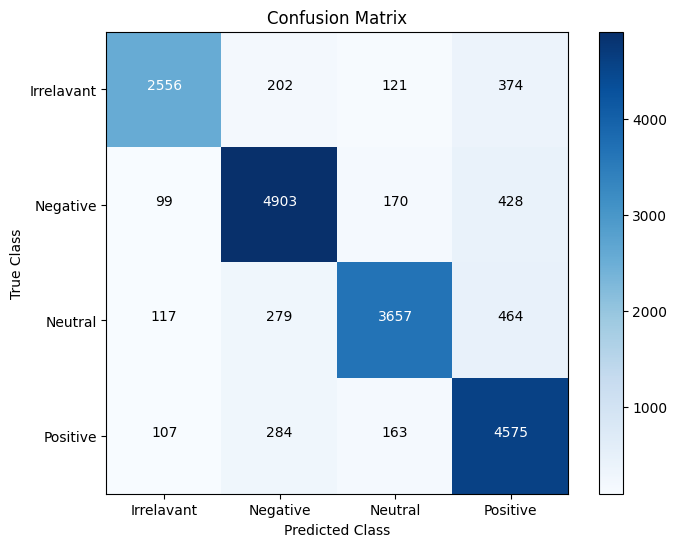

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(cm_sgd, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add number labels to the cells
thresh = cm_sgd.max() / 2
for i in range(cm_sgd.shape[0]):
    for j in range(cm_sgd.shape[1]):
        plt.text(j, i, format(cm_sgd[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_sgd[i, j] > thresh else "black")

# Add labels to the x and y axes
plt.xticks(range(cm_sgd.shape[1]), ['Irrelavant', 'Negative', 'Neutral', 'Positive'])
plt.yticks(range(cm_sgd.shape[0]), ['Irrelavant', 'Negative', 'Neutral', 'Positive'])

# Add a color bar
plt.colorbar()

# Show the plot
plt.show()

In [ ]:
def early_stopping(sgd, X_val_vec, y_val, patience=5):
    best_score = 0
    best_epoch = 0
    for epoch in range(100):
        sgd.partial_fit(X_train_vec, y_train)
        score = accuracy_score(y_val, sgd.predict(X_val_vec))
        if score > best_score:
            best_score = score
            best_epoch = epoch
        elif epoch - best_epoch > patience:
            break
    return best_epoch

In [ ]:
if hasattr(best_sgd, 'n_iter_'):
    print(f'Early stopping occurred at iteration {best_sgd.n_iter_}')
else:
    print('Early stopping did not occur')

Early stopping occurred at iteration 17


###########DONE WITH Logistic###########
##########nltk###############


In [ ]:
import nltk

In [ ]:
example = df['tweet_content'][39]
print(example)

Man Bethesda really needs to fix this dissapointing drops and the new Borderlands 3 It cant be fine to farm bosses on Mayhem 10 to get 1 legendary drop while anywhere else i get 6-10 drops.. Really sucks...


In [ ]:
nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Man',
 'Bethesda',
 'really',
 'needs',
 'to',
 'fix',
 'this',
 'dissapointing',
 'drops',
 'and',
 'the',
 'new',
 'Borderlands',
 '3',
 'It',
 'cant',
 'be',
 'fine',
 'to',
 'farm',
 'bosses',
 'on',
 'Mayhem',
 '10',
 'to',
 'get',
 '1',
 'legendary',
 'drop',
 'while',
 'anywhere',
 'else',
 'i',
 'get',
 '6-10',
 'drops',
 '..',
 'Really',
 'sucks',
 '...']

In [ ]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged

[('Man', 'NNP'),
 ('Bethesda', 'NNP'),
 ('really', 'RB'),
 ('needs', 'VBZ'),
 ('to', 'TO'),
 ('fix', 'VB'),
 ('this', 'DT'),
 ('dissapointing', 'NN'),
 ('drops', 'NNS'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('new', 'JJ'),
 ('Borderlands', 'NNP'),
 ('3', 'CD'),
 ('It', 'PRP'),
 ('cant', 'JJ'),
 ('be', 'VB'),
 ('fine', 'JJ'),
 ('to', 'TO'),
 ('farm', 'NN'),
 ('bosses', 'NNS'),
 ('on', 'IN'),
 ('Mayhem', 'NNP'),
 ('10', 'CD'),
 ('to', 'TO'),
 ('get', 'VB'),
 ('1', 'CD'),
 ('legendary', 'JJ'),
 ('drop', 'NN'),
 ('while', 'IN'),
 ('anywhere', 'JJ'),
 ('else', 'RB'),
 ('i', 'JJ'),
 ('get', 'VBP'),
 ('6-10', 'JJ'),
 ('drops', 'NNS'),
 ('..', 'VBP'),
 ('Really', 'RB'),
 ('sucks', 'NNS'),
 ('...', ':')]

In [ ]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (PERSON Man/NNP)
  (ORGANIZATION Bethesda/NNP)
  really/RB
  needs/VBZ
  to/TO
  fix/VB
  this/DT
  dissapointing/NN
  drops/NNS
  and/CC
  the/DT
  new/JJ
  Borderlands/NNP
  3/CD
  It/PRP
  cant/JJ
  be/VB
  fine/JJ
  to/TO
  farm/NN
  bosses/NNS
  on/IN
  Mayhem/NNP
  10/CD
  to/TO
  get/VB
  1/CD
  legendary/JJ
  drop/NN
  while/IN
  anywhere/JJ
  else/RB
  i/JJ
  get/VBP
  6-10/JJ
  drops/NNS
  ../VBP
  Really/RB
  sucks/NNS
  .../:)


In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))


In [ ]:
filtered_words = [word for word in tokens if word.lower() not in stop_words]

In [ ]:
filtered_words

['Man',
 'Bethesda',
 'really',
 'needs',
 'fix',
 'dissapointing',
 'drops',
 'new',
 'Borderlands',
 '3',
 'cant',
 'fine',
 'farm',
 'bosses',
 'Mayhem',
 '10',
 'get',
 '1',
 'legendary',
 'drop',
 'anywhere',
 'else',
 'get',
 '6-10',
 'drops',
 '..',
 'Really',
 'sucks',
 '...']

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores(example)

{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'compound': -0.4003}

In [ ]:
text = ' '.join(filtered_words)

In [ ]:
sentiment_score = sia.polarity_scores(text)
sentiment_score

{'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'compound': -0.6689}

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  text = row['tweet_content']
  myid = row['Tweet ID']
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word.lower() not in stop_words]
  res[myid] = sia.polarity_scores(' '.join(tokens))



  0%|          | 0/73996 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Tweet ID'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head(40)

,Tweet ID,neg,neu,pos,compound,Entity,sentiment,tweet_content
0,2401,0.610,0.390,0.000,-0.6908,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,0.610,0.390,0.000,-0.6908,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,0.610,0.390,0.000,-0.6908,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,0.610,0.390,0.000,-0.6908,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,0.610,0.390,0.000,-0.6908,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,0.610,0.390,0.000,-0.6908,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,0.000,0.000,0.000,0.0000,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,0.000,0.000,0.000,0.0000,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,0.000,0.000,0.000,0.0000,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,0.000,0.000,0.000,0.0000,Borderlands,Positive,So I spent a few hours making something for fu...


In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores(example)


{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'compound': -0.4003}

In [ ]:
#vaders.head()

,Tweet ID,neg,neu,pos,compound,Entity,sentiment,tweet_content
0,11790,0.183,0.583,0.233,0.1531,Verizon,Neutral,Verizon told US drop ‘most powerful 5G’ claim ...
1,11790,0.183,0.583,0.233,0.1531,Verizon,Neutral,"Verizon has been instructed to make the ""most ..."
2,11790,0.183,0.583,0.233,0.1531,Verizon,Neutral,"Verizon ordered to stop ""most powerful 5G"" law..."
3,11790,0.183,0.583,0.233,0.1531,Verizon,Neutral,Verizon told to stop ‘most powerful 5G’ claim ...
4,3359,0.000,0.274,0.726,0.6486,Facebook,Negative,SUPERBLY put. Thank you.


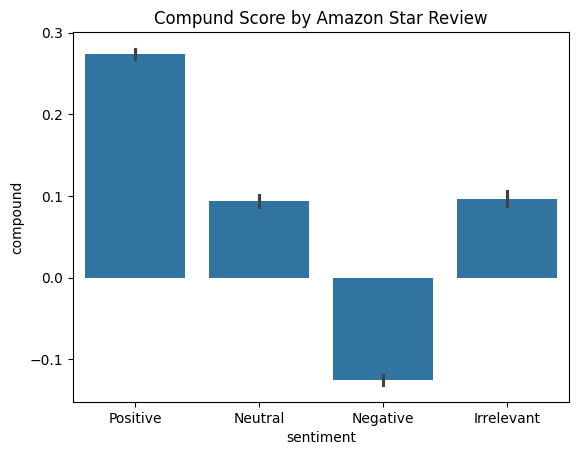

In [ ]:
ax = sns.barplot(data=vaders, x='sentiment', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

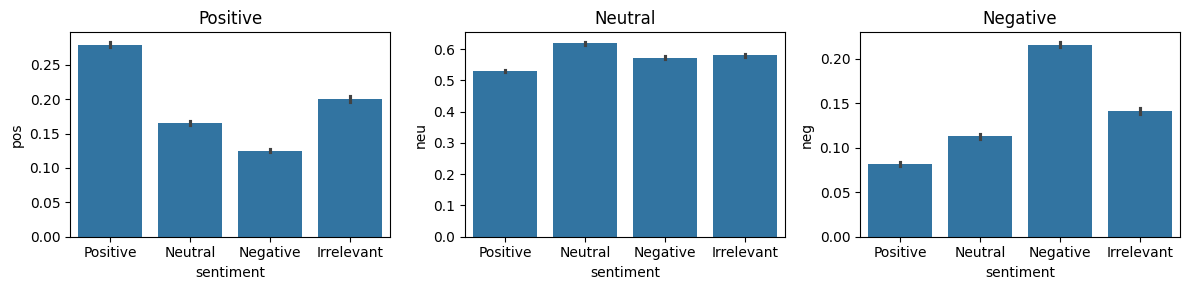

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='sentiment', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='sentiment', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='sentiment', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
def extract_score(text):
   sentiment_scores = sia.polarity_scores(text)
   polarity_score = sentiment_scores['compound']
   if polarity_score > 0.05:
        sentiment_label = 'positive'
   elif polarity_score < -0.05:
        sentiment_label = 'negative'
   elif polarity_score == 0.0:
        sentiment_label = 'neutral'
   else:
        sentiment_label = 'irrelevant'
   return sentiment_label

In [ ]:
df_nltk = df

In [ ]:
df_nltk['predicted_sentiment']=df['tweet_content'].apply(extract_score)


In [ ]:
df_nltk.head()

,Tweet ID,Entity,sentiment,tweet_content,predicted_sentiment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,negative
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,negative
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,negative
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,negative
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,negative


################nltk done######################
################Nlp#########

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
  

In [ ]:
model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from datasets import Dataset

ModuleNotFoundError: No module named 'datasets'

In [ ]:
X_train_ds = Dataset.from_pandas(X_train)
X_val_ds = Dataset.from_pandas(X_val)
X_test_ds =Dataset.from_pandas(eval_df)

In [ ]:
X_train_ds, X_val_ds, X_test_ds

(Dataset({
     features: ['Tweet ID', 'Entity', 'sentiment', 'tweet_content', '__index_level_0__'],
     num_rows: 56011
 }),
 Dataset({
     features: ['Tweet ID', 'Entity', 'sentiment', 'tweet_content', '__index_level_0__'],
     num_rows: 18671
 }),
 Dataset({
     features: ['Tweet ID', 'Entity', 'sentiment', 'tweet_content'],
     num_rows: 999
 }))

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer